In [4]:
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

csv_dir = Path('../csvs')

In [5]:
metrics = pd.read_csv(csv_dir / "site_representative_metrics.csv")
metrics = metrics.set_index('site')
# metrics = metrics.drop(columns=['site_type', 'year_estab', 'years_since_dist', 'elev_mean', 'slope_mean', 'forest_type'])
metrics

,mean__chm,max__chm,mean__veg_height_q30,mean__canopy_cover_gt1m,mean__fhd,mean__veg_height_cv,mean__vci,mean__crr,mean__veg_height_kurt,sd__chm,cv__chm,sd__canopy_cover_gt1m,sd__vci,sd__fhd,sd__crr,sd__veg_height_skew
site,,,,,,,,,,,,,,,,
EPO_O_04,38.239886,52.3364,11.945576,0.868069,2.177094,0.620750,0.546357,0.563695,0.187544,13.330358,0.348752,0.125496,0.114871,0.457687,0.167676,1.283775
EPO_O_13,27.299484,38.0424,11.010423,0.685449,1.972776,0.661154,0.536631,0.590778,0.207591,6.769295,0.246819,0.203709,0.141558,0.520719,0.175375,1.208187
EPO_Y_10,25.902798,32.9526,12.544017,0.652079,2.086827,0.640253,0.588872,0.611869,0.399777,5.477748,0.214736,0.193605,0.152311,0.538408,0.150632,1.099697
EPO_Y_15,19.754897,26.8930,5.932556,0.774936,2.093690,0.693868,0.624400,0.534772,-0.691528,4.028354,0.204997,0.144095,0.103413,0.346978,0.142027,0.930350
EPO_Y_36,14.125612,20.8292,4.015971,0.684135,1.622504,0.758431,0.523706,0.520444,-0.234955,4.098733,0.295683,0.197953,0.139617,0.430635,0.160847,1.122658
EPO_Y_37,19.546503,29.8392,6.103131,0.900535,2.201588,0.601493,0.638667,0.518785,-0.231919,5.400514,0.284503,0.104405,0.102920,0.354001,0.131940,0.901474
EPY_O_01,24.300720,30.3114,16.589948,0.723886,2.102990,0.394931,0.608015,0.732646,2.615524,3.348425,0.137875,0.161273,0.132946,0.459745,0.128598,1.109719
EPY_O_07,19.011238,26.9406,9.426508,0.723917,2.326841,0.459757,0.694907,0.623439,-0.267701,3.608839,0.193783,0.120105,0.117699,0.392896,0.115948,0.733684
EPY_O_09,16.115101,22.3550,11.017379,0.624741,1.597490,0.379940,0.500202,0.740153,1.688820,3.817097,0.236906,0.190139,0.134313,0.429018,0.153667,1.239037


In [6]:
# Scale and center the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(metrics)

# First fit PCA with full set of components
# and find out how many components needed to explain 95% of the variance
pca = PCA()
pca.fit(scaled_metrics)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

# n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

n = 3

pca = PCA(n_components=n)
pca.fit(scaled_metrics)
pca_scores = pca.transform(scaled_metrics)


pca_scores_df = pd.DataFrame(
    pca_scores,
    columns=pca.get_feature_names_out(),
    index=metrics.index
)

pca_loadings_df = pd.DataFrame(pca.components_.T, columns=pca.get_feature_names_out(), index=metrics.columns)
pca_loadings_df.index.name = 'metric'


pca_scores_df.to_csv(csv_dir / f"pca_scores_n{n}.csv")
pca_loadings_df.to_csv(csv_dir / f"pca_loadings_n{n}.csv")

In [7]:
np.cumsum(pca.explained_variance_ratio_) * 100

array([42.10425056, 73.14060179, 85.44033625])

In [8]:
pca.explained_variance_ratio_ * 100

array([42.10425056, 31.03635123, 12.29973447])

# Principal Components Analysis Results

Let's analyze the principal components in detail.

In [9]:
# Display explained variance information
print("Individual Component Explained Variance:")
for i, var in enumerate(pca.explained_variance_ratio_ * 100):
    print(f"PC{i+1}: {var:.2f}%")

print(f"\nCumulative Explained Variance:")
for i, var in enumerate(np.cumsum(pca.explained_variance_ratio_) * 100):
    print(f"PC1-PC{i+1}: {var:.2f}%")

print(f"\nTotal variance explained by {n} components: {np.sum(pca.explained_variance_ratio_) * 100:.2f}%")

Individual Component Explained Variance:
PC1: 42.10%
PC2: 31.04%
PC3: 12.30%

Cumulative Explained Variance:
PC1-PC1: 42.10%
PC1-PC2: 73.14%
PC1-PC3: 85.44%

Total variance explained by 3 components: 85.44%


In [10]:
# Examine the loadings to understand what each component represents
print("PCA Loadings (Top 5 highest absolute loadings per component):")
print("=" * 60)

for i in range(n):
    pc_name = f"pca{i}"
    pos_loadings = pca_loadings_df[pc_name].sort_values(ascending=False)
    neg_loadings = pca_loadings_df[pc_name].sort_values(ascending=True)
    
    print(f"\nPrincipal Component {i+1} (explains {pca.explained_variance_ratio_[i]*100:.2f}% of variance):")
    print("-" * 50)
    
    # Show top 5 features with their actual loadings (including sign)
    for j in range(3):
        metric = pos_loadings.index[j]
        actual_loading = pca_loadings_df.loc[metric, pc_name]
        print(f"{metric}: {actual_loading:+.3f}")
    for j in range(3):
        metric = neg_loadings.index[j]
        actual_loading = pca_loadings_df.loc[metric, pc_name]
        print(f"{metric}: {actual_loading:+.3f}")

PCA Loadings (Top 5 highest absolute loadings per component):

Principal Component 1 (explains 42.10% of variance):
--------------------------------------------------
mean__canopy_cover_gt1m: +0.349
mean__fhd: +0.328
mean__vci: +0.293
sd__canopy_cover_gt1m: -0.348
sd__vci: -0.320
cv__chm: -0.308

Principal Component 2 (explains 31.04% of variance):
--------------------------------------------------
sd__chm: +0.418
max__chm: +0.405
sd__veg_height_skew: +0.385
mean__vci: -0.198
sd__vci: -0.038
sd__canopy_cover_gt1m: -0.021

Principal Component 3 (explains 12.30% of variance):
--------------------------------------------------
mean__veg_height_kurt: +0.572
mean__crr: +0.469
sd__vci: +0.259
mean__veg_height_cv: -0.395
max__chm: -0.136
sd__chm: -0.133


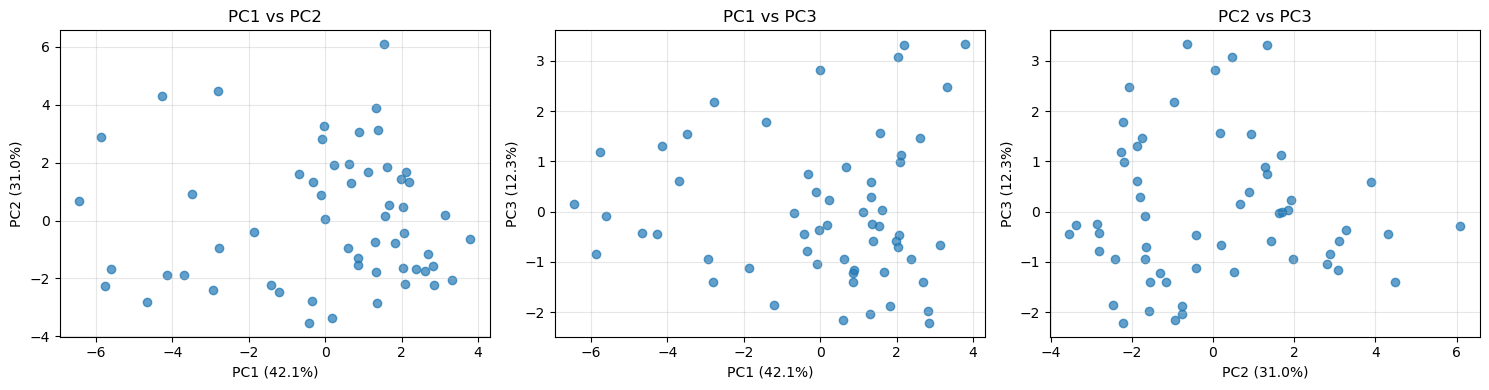

In [ ]:
# Show the PCA scores for the sites to see how they distribute along the components
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# PC1 vs PC2
axes[0].scatter(pca_scores_df['pca0'], pca_scores_df['pca1'], alpha=0.7)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('PC1 vs PC2')
axes[0].grid(True, alpha=0.3)

# PC1 vs PC3
axes[1].scatter(pca_scores_df['pca0'], pca_scores_df['pca2'], alpha=0.7)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
axes[1].set_title('PC1 vs PC3')
axes[1].grid(True, alpha=0.3)

# PC2 vs PC3
axes[2].scatter(pca_scores_df['pca1'], pca_scores_df['pca2'], alpha=0.7)
axes[2].set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[2].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
axes[2].set_title('PC2 vs PC3')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary of Principal Components Analysis

Based on the analysis above, here's what each principal component represents:

### **Principal Component 1 (42.10% of variance)**
**Interpretation: Forest Structure Complexity vs. Uniformity**

- **Positive loadings**: Higher canopy cover (mean), greater forest heterogeneity (FHD)
- **Negative loadings**: More variable canopy cover (sd), higher vegetation complexity index variability (sd VCI), higher height variability (cv CHM)

This component appears to contrast **uniform, dense canopy forests** (positive scores) with **structurally variable forests** (negative scores). Sites with high PC1 scores have consistent, dense canopy cover with high structural diversity, while sites with low PC1 scores have more variable canopy coverage and height distributions.

### **Principal Component 2 (31.04% of variance)**
**Interpretation: Forest Height and Vertical Development**

- **Dominant positive loadings**: All relate to canopy height metrics (sd CHM, max CHM, mean CHM) and height distribution skewness

This component clearly represents **overall forest height and vertical structure development**. Higher PC2 scores indicate taller forests with greater height variability and more complex vertical distributions.

### **Principal Component 3 (12.30% of variance)**
**Interpretation: Canopy Surface Roughness and Height Distribution Shape**

- **Positive loadings**: Vegetation height kurtosis (very strong at +0.572), canopy roughness (CRR)
- **Negative loadings**: Height coefficient of variation

This component captures **canopy surface texture and the "peakedness" of height distributions**. Higher PC3 scores indicate forests with rougher canopy surfaces and more concentrated (peaked) height distributions, suggesting areas with distinct height classes rather than gradual height transitions.

### **Overall Insights**

1. **Three components capture 85.44% of variance** - a good dimensional reduction from the original metrics
2. **PC1 and PC2 are the dominant axes** explaining 73.14% together
3. **The components represent complementary aspects**:
   - PC1: Horizontal structure complexity and uniformity
   - PC2: Vertical development and height
   - PC3: Surface roughness and height distribution shape

The scatter plots show good spread across all components, indicating the PCA successfully captured different aspects of forest structural variation across your sites.